Importing Libraries

In [380]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

Loading Train Set

In [381]:
df_train = pd.read_csv(r'C:\Users\pc\Documents\MACHINE LEARNING\Codveda-Internship\Decision Tree Classifier\datasets\churn train data.csv')
df_train.head()

,scaled__Account length,scaled__Area code,scaled__Number vmail messages,scaled__Total day minutes,scaled__Total day calls,scaled__Total day charge,scaled__Total eve minutes,scaled__Total eve calls,scaled__Total eve charge,scaled__Total night minutes,...,scaled__Customer service calls,encoded__International plan_No,encoded__International plan_Yes,encoded__Voice mail plan_No,encoded__Voice mail plan_Yes,encoded__Region_Midwest,encoded__Region_Northeast,encoded__Region_South,encoded__Region_West,remainder__Churn
0,1.837756,-0.535023,1.983109,-0.104002,-0.629192,-0.103852,-0.254049,-1.902520,-0.254072,-1.194073,...,0.296605,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,0.069707,-0.698831,1.763891,-0.273625,1.187956,-0.274002,0.279870,-0.420542,0.279256,-0.512699,...,1.795091,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
2,0.020594,-0.698831,-0.574437,1.770782,1.235775,1.770944,-0.467616,-1.161531,-0.467403,-0.958365,...,2.544334,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
3,0.438050,-0.535023,-0.574437,-0.841417,0.518480,-0.841167,-0.151294,0.161663,-0.152147,-0.780099,...,0.296605,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4,0.585388,1.688092,-0.574437,1.045866,0.279382,1.046233,-1.485085,1.061435,-1.484283,1.008508,...,-0.452638,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0


In [382]:
x = df_train.drop('remainder__Churn', axis=1)
y = df_train['remainder__Churn']

In [383]:
x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [384]:
dt_pipe = Pipeline([
    ('df', DecisionTreeClassifier())
])

In [385]:
dt_pipe.fit(x_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('df', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If floa

In [386]:
y_dt_pred = dt_pipe.predict(x_validate) 

In [387]:
dt_ac_validate = accuracy_score(y_validate, y_dt_pred)
print("Accuracy Score:", dt_ac_validate)

Accuracy Score: 0.9158878504672897


In [388]:
CM_dt = confusion_matrix(y_validate, y_dt_pred)
CM_dt = pd.DataFrame(CM_dt)
CM_dt

,0,1
0,86,6
1,3,12


In [389]:
CR_dt = classification_report(y_validate, y_dt_pred, output_dict=True)
CR_dt = pd.DataFrame(CR_dt)
CR_dt

,0,1,accuracy,macro avg,weighted avg
precision,0.966292,0.666667,0.915888,0.816479,0.924289
recall,0.934783,0.800000,0.915888,0.867391,0.915888
f1-score,0.950276,0.727273,0.915888,0.838774,0.919014
support,92.000000,15.000000,0.915888,107.000000,107.000000


Model Hyperparameter Tuning

In [390]:
dt_pipe1 = Pipeline([
    ('df', DecisionTreeClassifier(random_state=42))
])

In [391]:
dt_pipe1.fit(x_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('df', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If floa

In [392]:
y_dt1_pred = dt_pipe1.predict(x_validate) 

In [393]:
dt_ac_validate = accuracy_score(y_validate, y_dt1_pred)
print("Accuracy Score:", dt_ac_validate)

Accuracy Score: 0.9439252336448598


In [394]:
CM_dt = confusion_matrix(y_validate, y_dt1_pred)
CM_dt = pd.DataFrame(CM_dt)
CM_dt

,0,1
0,89,3
1,3,12


In [395]:
CR_dt = classification_report(y_validate, y_dt1_pred, output_dict=True)
CR_dt = pd.DataFrame(CR_dt)
CR_dt

,0,1,accuracy,macro avg,weighted avg
precision,0.967391,0.8,0.943925,0.883696,0.943925
recall,0.967391,0.8,0.943925,0.883696,0.943925
f1-score,0.967391,0.8,0.943925,0.883696,0.943925
support,92.000000,15.0,0.943925,107.000000,107.000000


Loading Test Set

In [396]:
df_test = pd.read_csv(r'C:\Users\pc\Documents\MACHINE LEARNING\Codveda-Internship\Decision Tree Classifier\datasets\churn test data.csv')
df_test.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Region
0,155,408,Yes,No,0,250.8,146,42.64,152.5,105,12.96,148.1,104,6.66,10.0,5,2.70,2,False,Midwest
1,81,415,No,No,0,324.7,48,55.20,236.4,82,20.09,187.6,78,8.44,13.1,5,3.54,0,True,West
2,48,415,No,Yes,27,141.1,109,23.99,224.7,94,19.10,174.3,122,7.84,13.2,2,3.56,1,False,West
3,67,415,No,Yes,41,174.7,86,29.70,160.6,93,13.65,155.3,108,6.99,13.4,1,3.62,0,False,Midwest
4,51,415,No,No,0,229.7,129,39.05,336.0,104,28.56,192.8,128,8.68,9.6,1,2.59,1,True,Midwest


In [397]:
ecd = LabelEncoder()
df_test['Churn'] = ecd.fit_transform(df_test['Churn'])

In [398]:
preprocessor = joblib.load(r'C:\Users\pc\Documents\MACHINE LEARNING\Codveda-Internship\Decision Tree Classifier\datasets\churn preprocessor.pkl')

In [399]:
test_clean = preprocessor.transform(df_test)

In [400]:
test_clean.head()

,scaled__Account length,scaled__Area code,scaled__Number vmail messages,scaled__Total day minutes,scaled__Total day calls,scaled__Total day charge,scaled__Total eve minutes,scaled__Total eve calls,scaled__Total eve charge,scaled__Total night minutes,...,scaled__Customer service calls,encoded__International plan_No,encoded__International plan_Yes,encoded__Voice mail plan_No,encoded__Voice mail plan_Yes,encoded__Region_Midwest,encoded__Region_Northeast,encoded__Region_South,encoded__Region_West,remainder__Churn
0,1.272963,-0.698831,-0.574437,1.242272,2.144349,1.242640,-1.009595,0.214591,-1.010213,-1.007884,...,0.296605,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0
1,-0.544200,-0.535023,-0.574437,2.561762,-2.541979,2.561825,0.680814,-1.002748,0.679845,-0.225492,...,-1.201882,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
2,-1.354556,-0.535023,1.398527,-0.716431,0.375021,-0.716181,0.445083,-0.367615,0.445181,-0.488930,...,-0.452638,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
3,-0.887987,-0.535023,2.421546,-0.116500,-0.724832,-0.116456,-0.846397,-0.420542,-0.846659,-0.865271,...,-1.201882,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
4,-1.280887,-0.535023,-0.574437,0.865529,1.331415,0.865580,2.687544,0.161663,2.687531,-0.122494,...,-0.452638,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1


Test Set Feature Selection

In [401]:
x_test = test_clean.drop('remainder__Churn', axis=1)
y_test = test_clean['remainder__Churn']

In [402]:
y_dt_test = dt_pipe1.predict(x_test) 

In [403]:
dt_ac_test = accuracy_score(y_test, y_dt_test)
print("Accuracy Score:", dt_ac_test)

Accuracy Score: 0.9328358208955224


In [404]:
CM_dt_test = confusion_matrix(y_test, y_dt_test)
CM_dt_test = pd.DataFrame(CM_dt_test)
CM_dt_test

,0,1
0,112,3
1,6,13


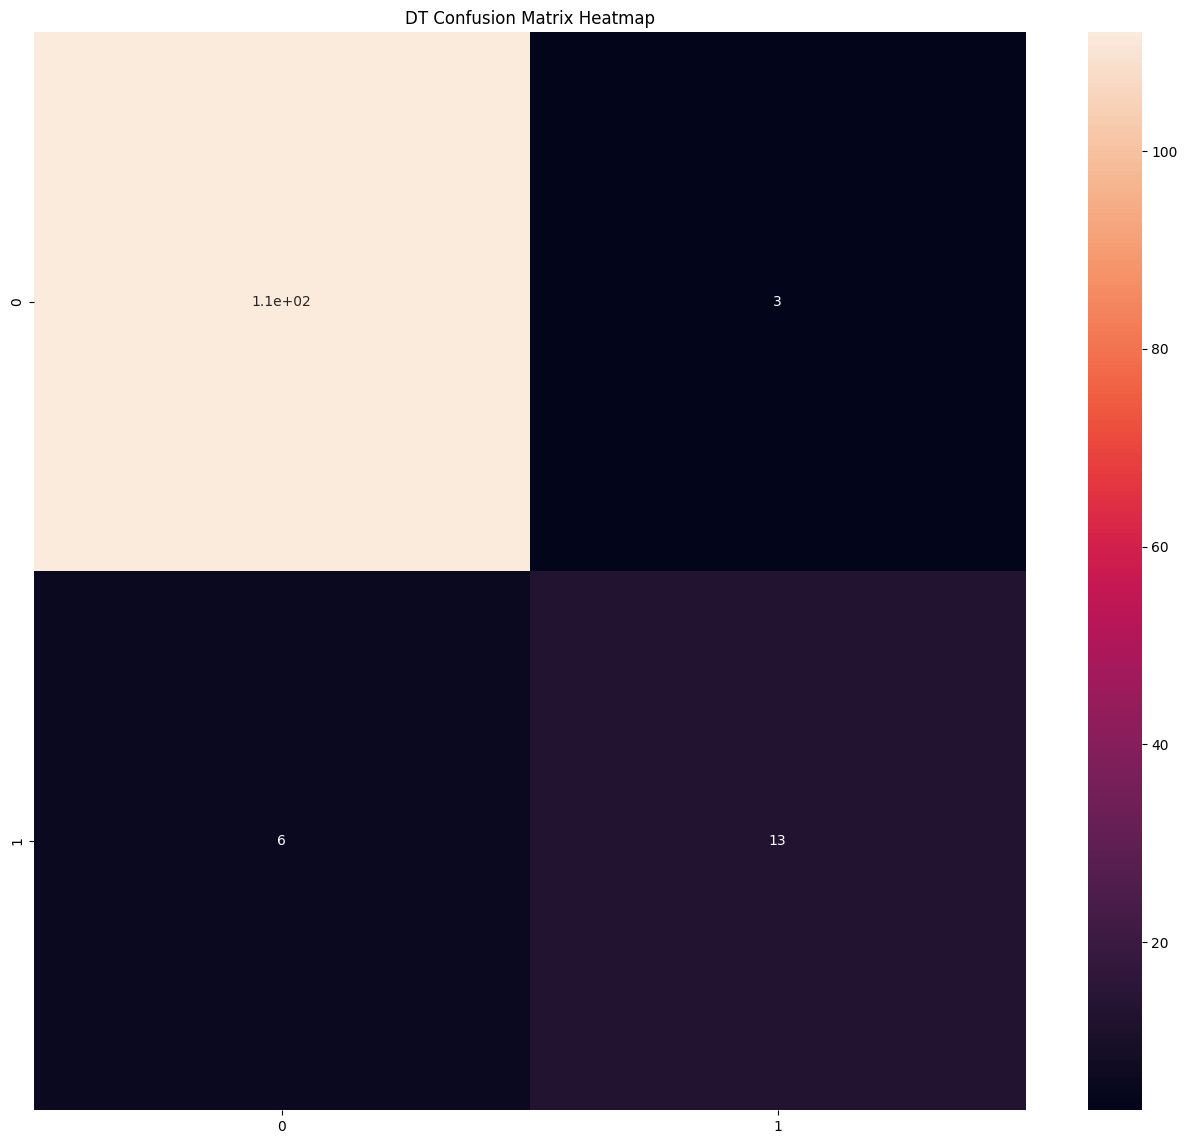

In [405]:
plt.figure(figsize=(16,14))
sns.heatmap(data=CM_dt_test, annot=True)
plt.title('DT Confusion Matrix Heatmap')
plt.show()

In [406]:
CR_dt_test = classification_report(y_test, y_dt_test, output_dict=True)
CR_dt_test = pd.DataFrame(CR_dt_test)
CR_dt_test

,0,1,accuracy,macro avg,weighted avg
precision,0.949153,0.812500,0.932836,0.880826,0.929776
recall,0.973913,0.684211,0.932836,0.829062,0.932836
f1-score,0.961373,0.742857,0.932836,0.852115,0.930390
support,115.000000,19.000000,0.932836,134.000000,134.000000


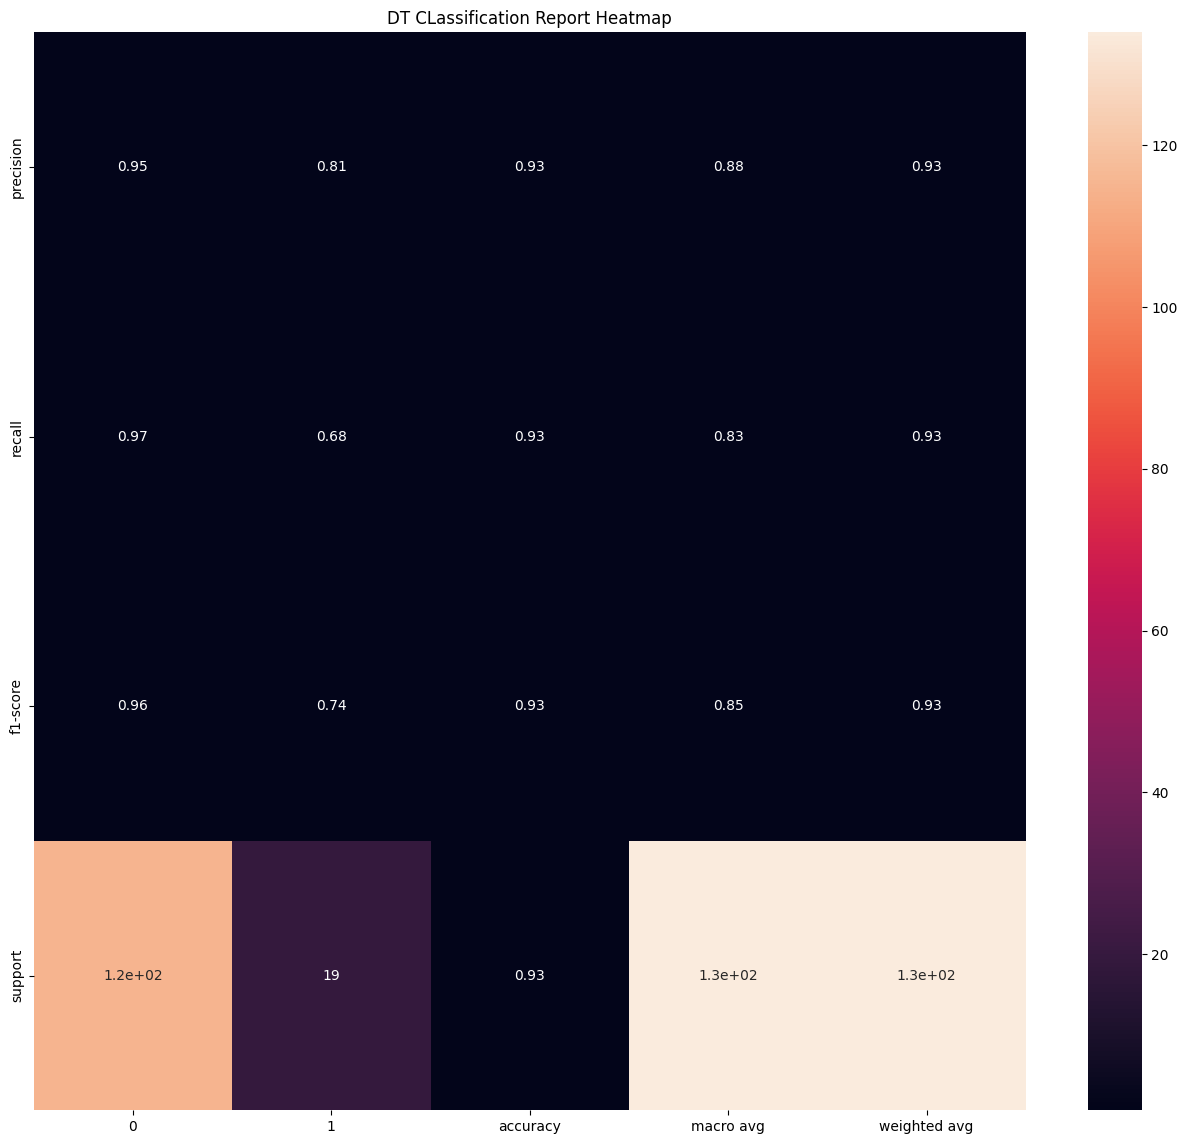

In [407]:
plt.figure(figsize=(16,14))
sns.heatmap(data=CR_dt_test, annot=True)
plt.title('DT CLassification Report Heatmap')
plt.show()

In [408]:
joblib.dump(dt_pipe1, 'best churn model.pkl')

['best churn model.pkl']